# Adaboost
For this exercise you will implement AdaBoost from scratch and applied it to a spam dataset. You will be classifying data into spam and not spam. You can call DecisionTreeClassifier from sklearn to learn your base classifiers.

Here is how you train a decision tree classifier with weights.

`
h = DecisionTreeClassifier(max_depth=1, random_state=0)
h.fit(X, Y, sample_weight=w)
`

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
# accuracy computation
def accuracy(y, pred):
    return np.sum(y == pred) / float(len(y)) 

In [3]:
import pandas as pd

In [4]:
def parse_spambase_data(filename):
    """ Given a filename return X and Y numpy arrays

    X is of size number of rows x num_features
    Y is an array of size the number of rows
    Y is the last element of each row. (Convert 0 to -1)
    """
    # YOUR CODE HERE
#     raise NotImplementedError()
    data = pd.read_csv(filename, header=None)
    is_null = data.iloc[:,-1].isnull()
    data = data[~is_null]
    X = np.array(data.iloc[:,:-1])
    Y = data.iloc[:,-1]
    Y = np.array([-1 if x == 0 else x for x in Y])
    return X, Y

In [5]:
y_test = np.array([1., -1., 1., 1., -1., -1., 1., 1., 1., -1.])
X, Y = parse_spambase_data("tiny.spam.train")
for i in range(len(y_test)): assert(y_test[i] == Y[i])
n, m = X.shape
assert(n == 10)
assert(m == 57)

In [6]:
def adaboost(X, y, num_iter):
    """Given an numpy matrix X, a array y and num_iter return trees and weights 
   
    Input: X, y, num_iter
    Outputs: array of trees from DecisionTreeClassifier
             trees_weights array of floats
    Assumes y is {-1, 1}
    """
    trees = []
    trees_weights = [] 
    N, _ = X.shape
    d = np.ones(N) / N

    # YOUR CODE HERE
    for i in range(num_iter):
        h = DecisionTreeClassifier(max_depth=1, random_state=0)
        h.fit(X, y, sample_weight=d)
        trees.append(h)
        G_x = h.predict(X)
        error = sum(d * (y != G_x)) / sum(d)
        if error == 0:
            trees_weights.append(d)
            break
        alpha = np.log((1 - error) / error)
        for i in range(len(d)):
            if y[i] != G_x[i]:
                d[i] = d[i] * np.exp(alpha)
        trees_weights.append(alpha)
#     raise NotImplementedError()
    return trees, trees_weights

In [7]:
X, Y = parse_spambase_data("tiny.spam.train")
trees, weights = adaboost(X, Y, 2)
assert(len(trees) == 2)
assert(len(weights) == 2)
assert(isinstance(trees[0], DecisionTreeClassifier))

In [8]:
x = np.array([[0, -1], [1, 0], [-1, 0]])
y = np.array([-1, 1, 1])
trees, weights = adaboost(x, y, 1)
h = trees[0]
pred = h.predict(x)
for i in range(len(y)): assert(pred[i] == y[i])

In [9]:
def adaboost_predict(X, trees, trees_weights):
    """Given X, trees and weights predict Y
    """
    # X input, y output
    N, _ =  X.shape
    y = np.zeros(N)
    # YOUR CODE HERE
    sum_alpha_G = np.zeros(N)
    for i in range(len(trees)):
        G_x = np.array(trees[i].predict(X))
        alpha_G = G_x * trees_weights[i]
        sum_alpha_G = sum_alpha_G + alpha_G
    y = [-1 if x < 0 else 1 for x in sum_alpha_G]    
#     raise NotImplementedError()
    return y

In [10]:
x = np.array([[0, -1], [1, 0], [-1, 0]])
y = np.array([-1, 1, 1])
trees, weights = adaboost(x, y, 1)
pred = adaboost_predict(x, trees, weights)
for i in range(len(y)):
    assert(pred[i] == y[i])

In [11]:
X, Y = parse_spambase_data("spambase.train")
X_test, Y_test = parse_spambase_data("spambase.test")
trees, trees_weights = adaboost(X, Y, 10)
Yhat = adaboost_predict(X, trees, trees_weights)
Yhat_test = adaboost_predict(X_test, trees, trees_weights)
    
acc_test = accuracy(Y_test, Yhat_test)
acc_train = accuracy(Y, Yhat)
print("Train Accuracy %.4f" % acc_train)
print("Test Accuracy %.4f" % acc_test)
assert(np.around(acc_train, decimals=4)==0.9111)
assert(np.around(acc_test, decimals=4)==0.9190)

Train Accuracy 0.9111
Test Accuracy 0.9190


### 2.2

In [34]:
import matplotlib.pyplot as plt

In [44]:
test_acc_list = []
train_acc_list = []
for i in range(2000):
    trees, trees_weights = adaboost(X, Y, i)
    Yhat = adaboost_predict(X, trees, trees_weights)
    Yhat_test = adaboost_predict(X_test, trees, trees_weights)
    
    acc_test = accuracy(Y_test, Yhat_test)
    test_acc_list.append(acc_test)
    acc_train = accuracy(Y, Yhat)
    train_acc_list.append(acc_train)
    
    if i % 50 == 0:
        print(i)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950


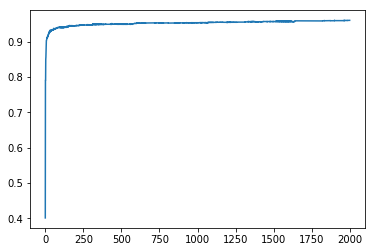

In [47]:
plt.plot(range(2000), train_acc_list)
plt.show()

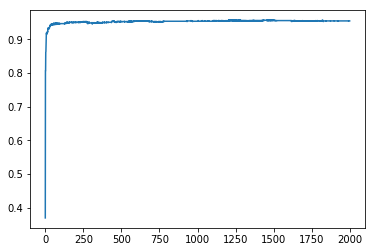

In [48]:
plt.plot(range(2000), test_acc_list)
plt.show()

In [78]:
print("The highest accuracy for train is " + str(max(train_acc_list)))
print("When the number of trees is "+str(train_acc_list.index(max(train_acc_list))))

The highest accuracy for train is 0.960555555556
When the number of trees is 1899


In [81]:
print("The highest accuracy for test is " + str(max(test_acc_list)))
print("When the number of trees is "+str(test_acc_list.index(max(test_acc_list))))

The highest accuracy for test is 0.957
When the number of trees is 1202


### 2.3

In [55]:
import xgboost as xgb

In [69]:
train_acc_list_xgb = []
test_acc_list_xgb = []
for i in range(1, 2001):
    xgm = xgb.XGBClassifier(n_estimators=i)
    xgm.fit(X, Y)
    Y_hat = xgm.predict(X)
    Yhat_test = xgm.predict(X_test)
    
    acc_test = accuracy(Y_test, Yhat_test)
    test_acc_list_xgb.append(acc_test)
    acc_train = accuracy(Y, Y_hat)
    train_acc_list_xgb.append(acc_train)
    

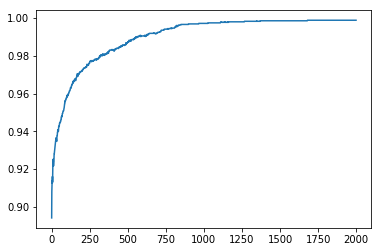

In [70]:
plt.plot(range(2000), train_acc_list_xgb)
plt.show()

In [82]:
print("The highest accuracy for train is " + str(max(train_acc_list_xgb)))
print("When the number of trees is "+str(train_acc_list_xgb.index(max(train_acc_list_xgb))))

The highest accuracy for test is 0.998888888889
When the number of trees is 1680


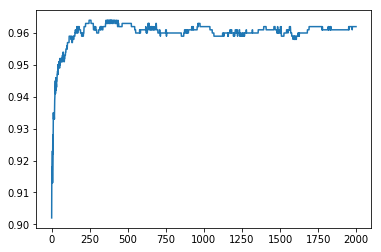

In [71]:
plt.plot(range(2000), test_acc_list_xgb)
plt.show()

In [83]:
print("The highest accuracy for test is " + str(max(train_acc_list_xgb)))
print("When the number of trees is "+str(train_acc_list_xgb.index(max(train_acc_list_xgb))))

The highest accuracy for test is 0.998888888889
When the number of trees is 1680
